In [3]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Q.1
* We have use the following dataset in the course material to generate two datasets form the same distribution but which have different sample means
  * here I am generating only 5 samples, insteaf of the 40 generated in the course material

In [5]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 10, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
<dbl>,<chr>
10.291195,Site 1
11.388863,Site 1
10.649010,Site 1
11.477876,Site 1
10.438720,Site 1
10.522318,Site 2
9.955392,Site 2
11.484413,Site 2
8.408989,Site 2


In [ ]:
* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [15]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 10.11935

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed

In [22]:
# Write your code here

tapply(complete_data$measure, complete_data$site_name, mean)

Site 1   Site 2 
10.84913 10.11935

Q.2 
Recall that the test conducted on full version of data_1 and data_2 led us to conlclude that the difference between the two datasets is statistically significant, when both samples were in fact from the same distirbution  $\mathcal{N}(\mu=10, \sigma=1)$

* Use the boostrapping-based test covered in class to assess whether you arrive at the same conclusion

* You can generate the data using the code snippet below



In [8]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 10, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)


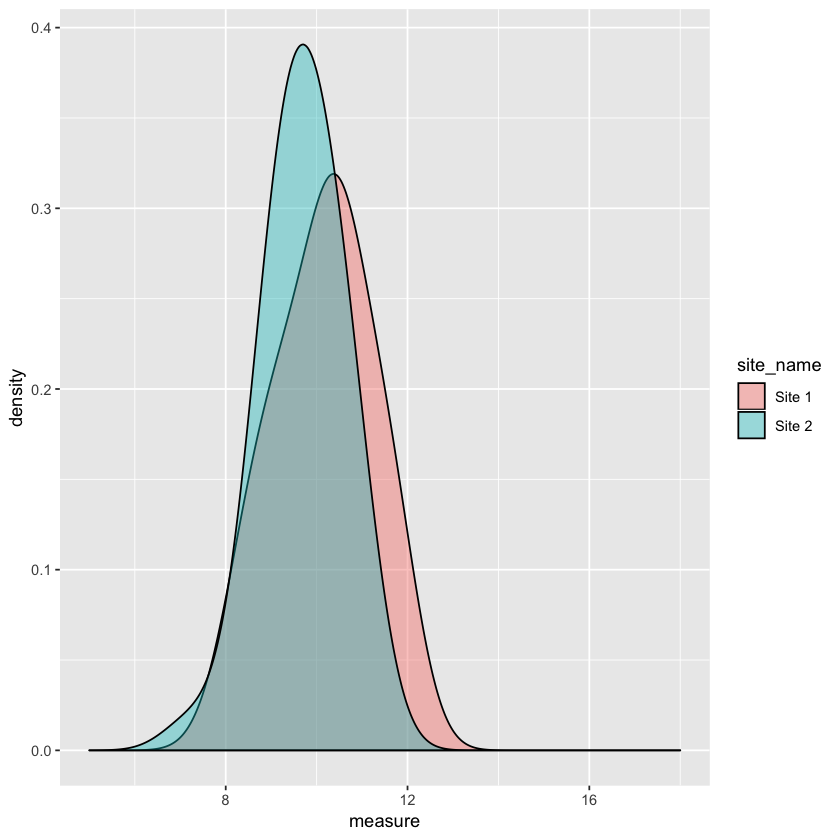

In [9]:
ggplot(complete_data, aes(x=measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.60) + 
  xlim(5,18)


In [11]:
data = t.test(data_1$measure, data_2$measure,)
str(data)

List of 9
 $ statistic  : Named num 2.11
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 74.2
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 0.0385
 $ conf.int   : num [1:2] 0.0241 0.8682
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 10.1 9.7
  ..- attr(*, "names")= chr [1:2] "mean of x" "mean of y"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "data_1$measure and data_2$measure"
 - attr(*, "class")= chr "htest"


In [12]:
data$p.value

[1] 0.03854679

In [24]:
replicate(10, 
    t.test(rnorm(40, 10, 1), rnorm(40, 10, 1))$p.value
) 

replicate(10, 
    t.test(rnorm(40, 10, 1), rnorm(40, 10, 1))$p.value
) < 0.05


[1] 0.83547612 0.96928364 0.50639532 0.58073225 0.61622712 0.01782432
 [7] 0.10502085 0.03381244 0.13670871 0.48857907

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [35]:
t_test = replicate(10000, 
    t.test(rnorm(40, 10, 1), rnorm(40, 10, 1))$p.value
) < 0.05

In [36]:
sum(t_test)/length(t_test)

[1] 0.0519

Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed a site Y with somewhat differentenvironmental conditions and obtains the following proportions for the same coral (0.61, 0.19, 0.20). Use the multinomial non-parameteric hypotheses test to assess the proportions obtained at sites X and Y are statistically differnet



In [53]:
set.seed(40)
model_x_proportions = c(0.60, 0.19, 0.21)
datax = sample(c("P.lobata", "M.capitata","P.mendrina"), 100, replace=TRUE, prob=model_x_proportions)
datax

[1] "P.mendrina" "M.capitata" "P.mendrina" "P.lobata"   "P.lobata"  
  [6] "P.lobata"   "P.lobata"   "P.lobata"   "P.lobata"   "P.lobata"  
 [11] "P.lobata"   "P.mendrina" "P.lobata"   "P.lobata"   "M.capitata"
 [16] "P.mendrina" "P.lobata"   "M.capitata" "P.lobata"   "P.lobata"  
 [21] "P.lobata"   "P.lobata"   "P.lobata"   "P.lobata"   "P.mendrina"
 [26] "P.mendrina" "P.lobata"   "P.mendrina" "P.mendrina" "P.mendrina"
 [31] "M.capitata" "P.lobata"   "P.mendrina" "P.lobata"   "P.mendrina"
 [36] "P.lobata"   "M.capitata" "P.mendrina" "P.lobata"   "P.lobata"  
 [41] "M.capitata" "P.lobata"   "P.lobata"   "P.lobata"   "M.capitata"
 [46] "P.lobata"   "P.lobata"   "P.lobata"   "P.lobata"   "P.lobata"  
 [51] "P.mendrina" "P.lobata"   "P.lobata"   "P.mendrina" "P.mendrina"
 [56] "M.capitata" "P.mendrina" "P.lobata"   "P.lobata"   "P.lobata"  
 [61] "P.mendrina" "P.lobata"   "P.lobata"   "P.lobata"   "P.lobata"  
 [66] "P.lobata"   "M.capitata" "P.lobata"   "P.lobata"   "M.capitata"
 [71] "P.mendrina" "P.mendrina" "P.lobata"   "P.mendrina" "P.lobata"  
 [76] "P.mendrina" "P.lobata"   "P.lobata"   "P.mendrina" "P.mendrina"
 [81] "M.capitata" "M.capitata" "P.mendrina" "P.lobata"   "M.capitata"
 [86] "P.mendrina" "P.lobata"   "M.capitata" "P.lobata"   "P.mendrina"
 [91] "P.mendrina" "P.mendrina" "M.capitata" "P.lobata"   "M.capitata"
 [96] "P.lobata"   "P.lobata"   "P.lobata"   "P.mendrina" "P.lobata"

In [46]:
sum(data=="P.lobata")/length(data)
sum(data=="M.capitata")/length(data)
sum(data=="P.mendrina")/length(data)

[1] 0.48

[1] 0.3

[1] 0.22

In [54]:
set.seed(40)
model_y_proportions = c(0.61, 0.19, 0.20)
datay = sample(c("P.lobata", "M.capitata","P.mendrina"), 100, replace=TRUE, prob=model_y_proportions)
datay

[1] "P.mendrina" "M.capitata" "P.mendrina" "P.lobata"   "P.lobata"  
  [6] "P.lobata"   "P.lobata"   "P.lobata"   "P.lobata"   "P.lobata"  
 [11] "P.lobata"   "P.mendrina" "P.lobata"   "P.lobata"   "M.capitata"
 [16] "P.mendrina" "P.lobata"   "M.capitata" "P.lobata"   "P.lobata"  
 [21] "P.lobata"   "P.lobata"   "P.lobata"   "P.lobata"   "P.mendrina"
 [26] "P.mendrina" "P.lobata"   "P.mendrina" "P.mendrina" "P.mendrina"
 [31] "M.capitata" "P.lobata"   "P.mendrina" "P.lobata"   "P.mendrina"
 [36] "P.lobata"   "M.capitata" "P.mendrina" "P.lobata"   "P.lobata"  
 [41] "M.capitata" "P.lobata"   "P.lobata"   "P.lobata"   "M.capitata"
 [46] "P.lobata"   "P.lobata"   "P.lobata"   "P.lobata"   "P.lobata"  
 [51] "P.mendrina" "P.lobata"   "P.lobata"   "P.mendrina" "P.mendrina"
 [56] "M.capitata" "P.mendrina" "P.lobata"   "P.lobata"   "P.lobata"  
 [61] "P.mendrina" "P.lobata"   "P.lobata"   "P.lobata"   "P.lobata"  
 [66] "P.lobata"   "M.capitata" "P.lobata"   "P.lobata"   "M.capitata"
 [71] "P.mendrina" "P.mendrina" "P.lobata"   "P.mendrina" "P.lobata"  
 [76] "P.mendrina" "P.lobata"   "P.lobata"   "P.mendrina" "P.mendrina"
 [81] "M.capitata" "M.capitata" "P.mendrina" "P.lobata"   "M.capitata"
 [86] "P.mendrina" "P.lobata"   "M.capitata" "P.lobata"   "P.mendrina"
 [91] "P.mendrina" "P.mendrina" "M.capitata" "P.lobata"   "M.capitata"
 [96] "P.lobata"   "P.lobata"   "P.lobata"   "P.mendrina" "P.lobata"

In [55]:
kruskal.test(model_y_proportions,model_x_proportions)
#Kruskal-Wallis: Evaluates differences between 3 or more independent groups


	Kruskal-Wallis rank sum test

data:  model_y_proportions and model_x_proportions
Kruskal-Wallis chi-squared = 2, df = 2, p-value = 0.3679
